# Study Area and EEZ boundary
This notebook produces the map of the study area and EEZ boundaries for the paper "Illuminating Dark Fishing Fleets in North Korea," published in _Science Advances_ on July 22, 2020

Last updated: 23 February 2020

Developed by Global Fishing Watch Inc.

In [1]:
#
# Import libraries
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

In [2]:
#
# Pull boundary shapefile location
#
_eez_prk_wo_mz = '../1-boundary/eez_prk_wo_mz/eez_prk_wo_mz'
_eez_prk_mz = '../1-boundary/eez_prk_mz/eez_prk_mz'
_study_area = '../1-boundary/study_area/study_area'
_eez_prk_overlap_rus = '../1-boundary/eez_prk_overlap_rus/eez_prk_overlap_rus'

## Boundaries around North Korea

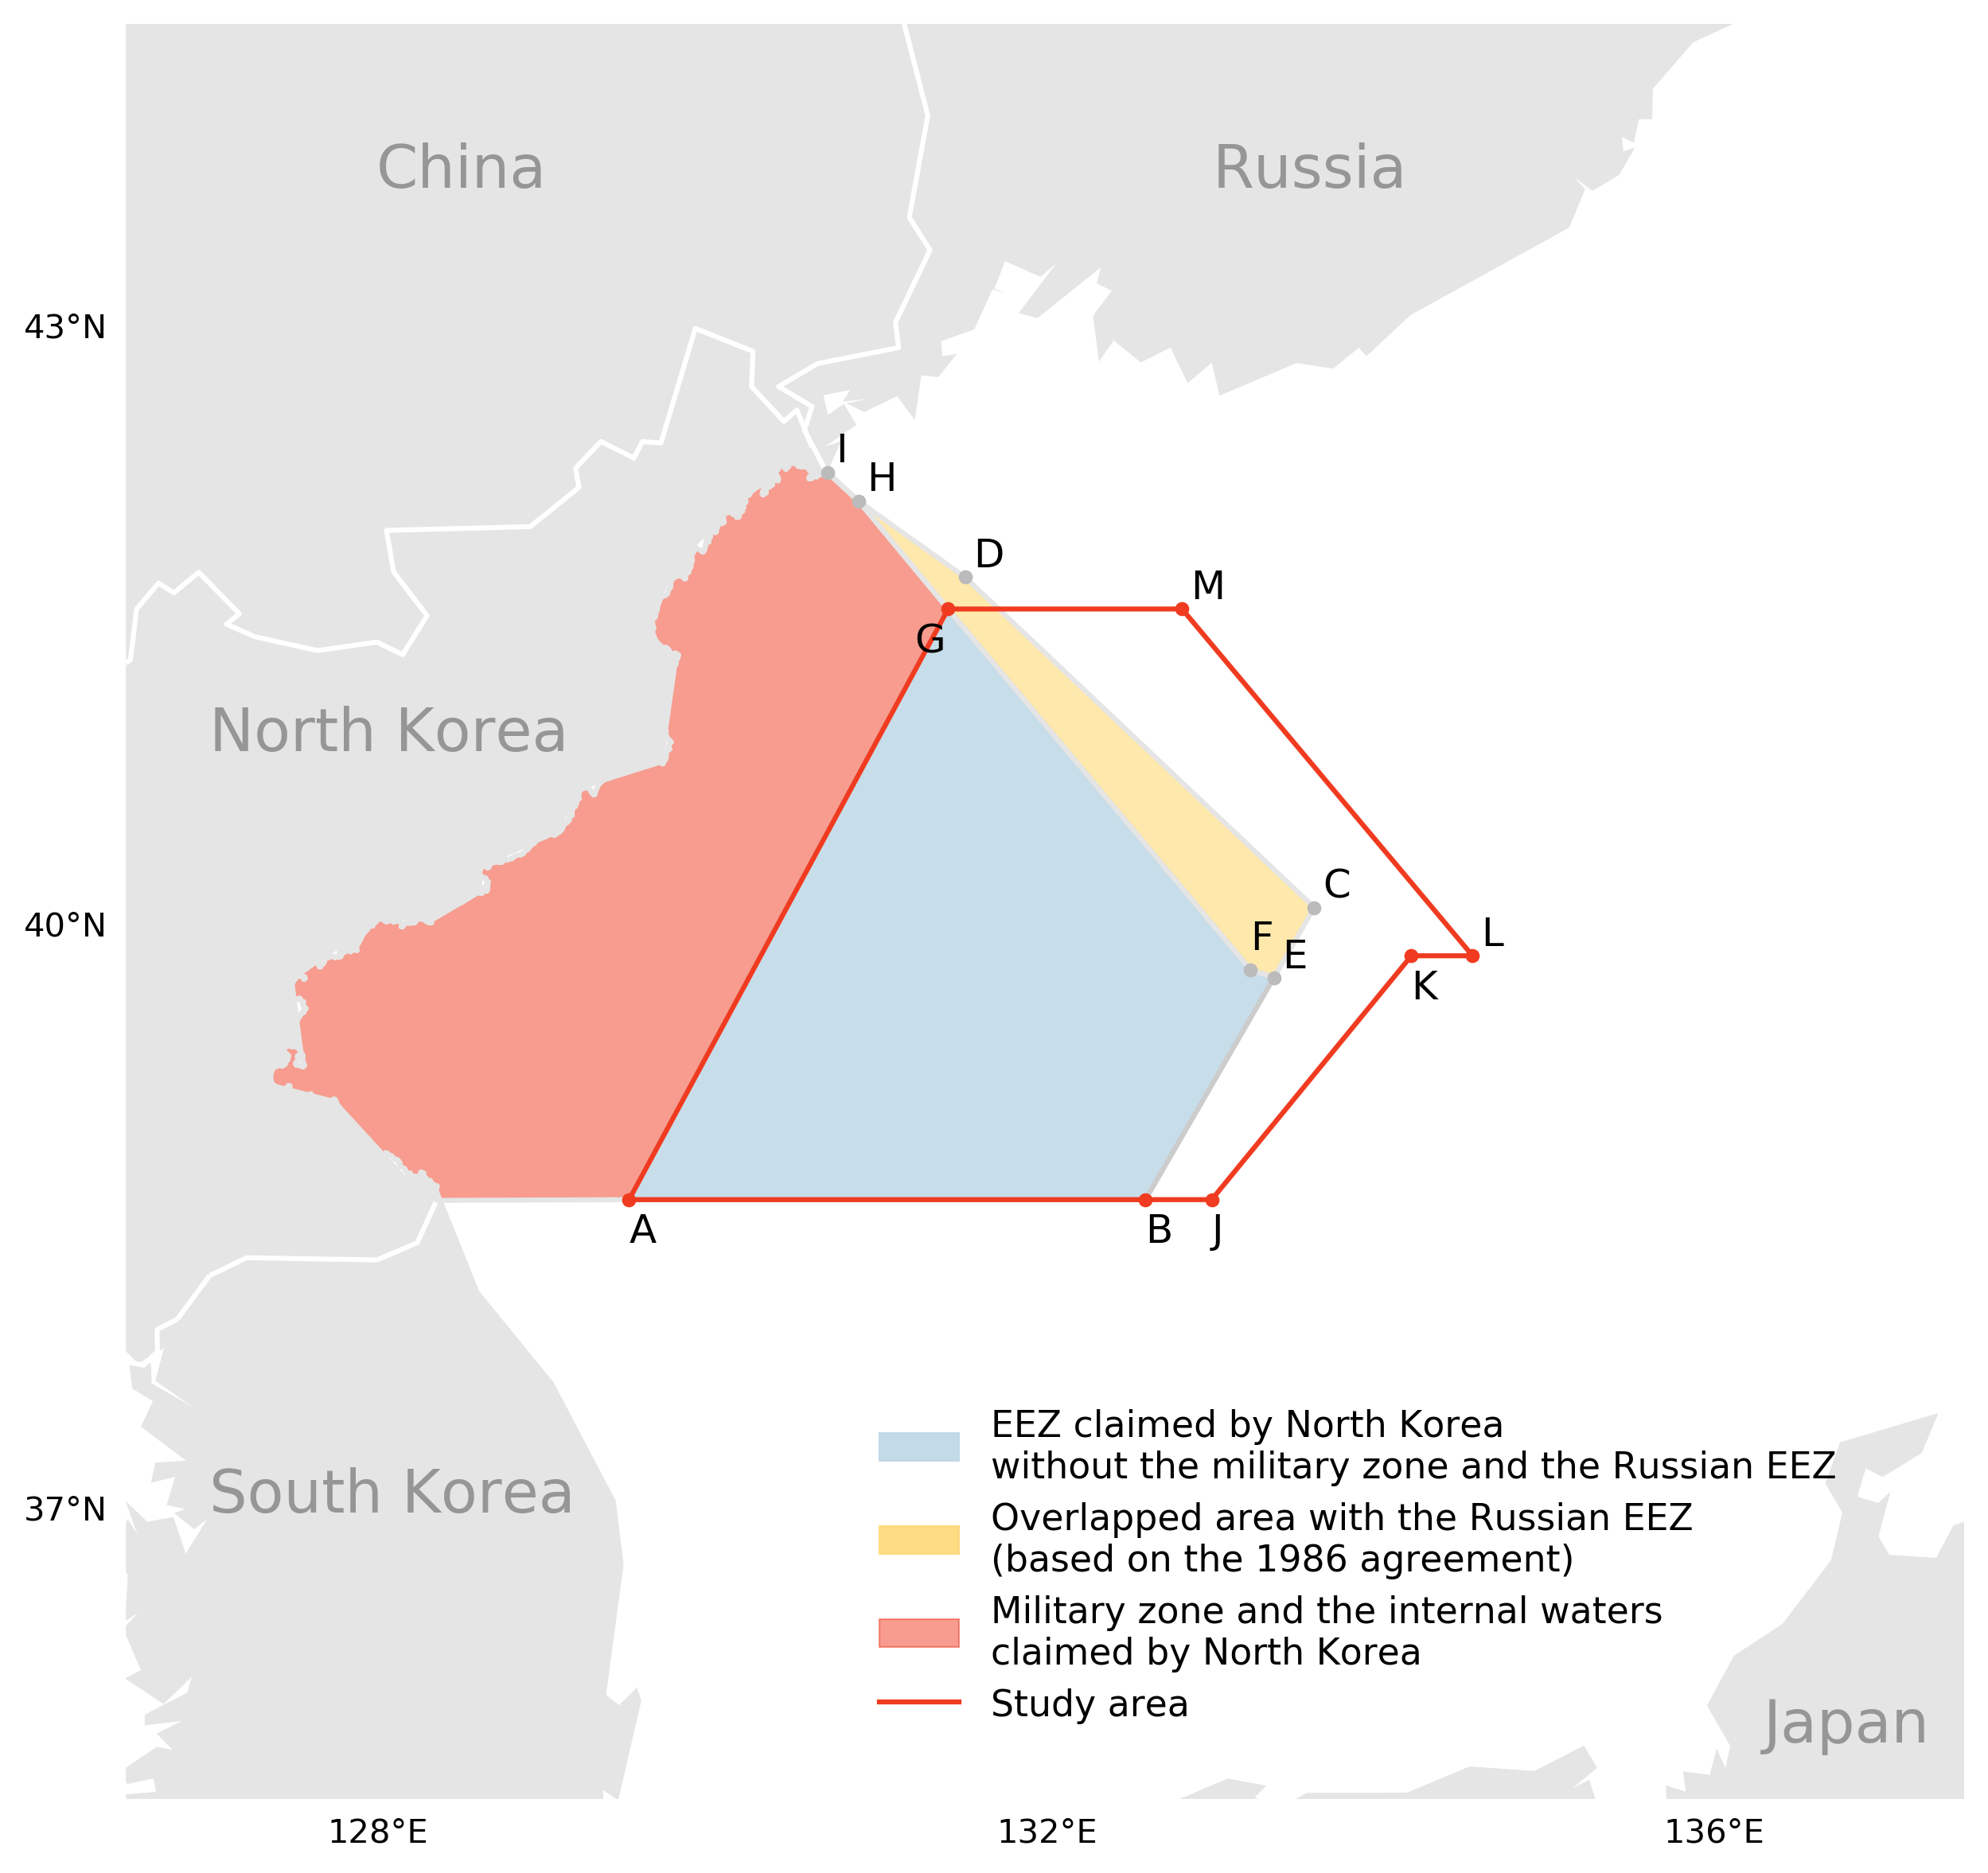

In [3]:
#
# Map the boundary areas including the study area 
# and the claimed EEZ used in the paper
#

#
# default map setting
llcrnrlon = 126.5
urcrnrlon = 137.5
llcrnrlat = 35.5
urcrnrlat = 44.5

#
# set longitude, latitude ticks on x- and y-axes
gap_lat = 3
gap_lon = 4
med_lat = 40.0
med_lon = 132.0
num_tick_lat = 3
num_tick_lon = 3

fig = plt.figure(figsize=(8,8), dpi=300, facecolor='white')

#
# default Basemap setting
ax = fig.add_subplot(111)
m = Basemap(llcrnrlon=llcrnrlon, llcrnrlat=llcrnrlat,
            urcrnrlon=urcrnrlon, urcrnrlat=urcrnrlat,
            lat_ts=0, projection='mill', resolution="l")
m.drawmapboundary(fill_color='white', color='white', zorder=0.5)
m.fillcontinents(color='#E5E5E5', lake_color='#E5E5E5', zorder=1) 
m.drawcountries(linewidth=1.5, color='white', zorder=1.5)

m.drawparallels(np.arange(med_lat-gap_lat*(np.ceil(num_tick_lat/2)), 
                          med_lat+gap_lat*np.ceil(num_tick_lat/2.0), 
                          gap_lat), labels=[1,0,0,0], linewidth=0.01, zorder=0)
m.drawmeridians(np.arange(med_lon-gap_lon*(np.ceil(num_tick_lon/2)), 
                          med_lon+gap_lon*np.ceil(num_tick_lon/2.0), 
                          gap_lon), labels=[0,0,0,1], linewidth=0.01, zorder=0)

#
# Read EEZ shapefile and DPRK EEZ
m.readshapefile(_eez_prk_wo_mz, 'eez', zorder=2, linewidth=1.5, color='#CCCCCC')
overlap = m.readshapefile(_eez_prk_overlap_rus, 'overlap_rus', zorder=2,
                          linewidth=1.5, color='#E5E5E5')
msa = m.readshapefile(_eez_prk_mz, 'msa', zorder=2, linewidth=1.5, color='#E5E5E5')
sa = m.readshapefile(_study_area, 'sa',zorder=2.5, linewidth=1.5, color='#f03b20')
    
#
# Add area polygon
colors = ['#bdd7e7', '#fed976', '#f03b20', '#E5E5E5']

patches_to_add = []
for info, shape in zip(m.eez_info, m.eez):
    patches_to_add.append( Polygon(np.array(shape) ) )
pc_to_add = PatchCollection(patches_to_add, match_original=False, 
                            facecolor=colors[0], alpha=0.6, zorder=1)
plt.gca().add_collection(pc_to_add)
test = plt.gca().add_artist(pc_to_add)

patches_to_add = []
for info, shape in zip(m.msa_info, m.msa):
    patches_to_add.append( Polygon(np.array(shape) ) )
pc_to_add = PatchCollection(patches_to_add, match_original=False, 
                            facecolor=colors[2], alpha=0.5, zorder=1)
plt.gca().add_collection(pc_to_add)

patches_to_add = []
for info, shape in zip(m.overlap_rus_info, m.overlap_rus):
    patches_to_add.append( Polygon(np.array(shape) ) )
pc_to_add = PatchCollection(patches_to_add, match_original=False, 
                            facecolor=colors[1], alpha=0.6, zorder=1)
plt.gca().add_collection(pc_to_add)

m.plot([], [], color='#f03b20', linewidth=1.5, label='Study area')
eez = mpatches.Patch(color=colors[0], label="N.Korea's claimed EEZ without overlapped area")
military = mpatches.Patch(color=colors[1], label='Military zone')
overlapped = mpatches.Patch(color=colors[2], label='Overlapped area')

#
# Handle the legend
order = [0, 2, 1]
patches = [eez, overlapped, military]
texts = ['EEZ claimed by North Korea \nwithout the military zone and the Russian EEZ',
         'Overlapped area with the Russian EEZ \n(based on the 1986 agreement)',
         'Military zone and the internal waters \nclaimed by North Korea']
handles, labels = plt.gca().get_legend_handles_labels()
handles.extend([patches[idx] for idx in order])
labels.extend([texts[idx] for idx in order])
order = [1, 3, 2, 0]
leg = plt.legend([handles[idx] for idx in order],
                 [labels[idx] for idx in order], 
                 bbox_to_anchor=(0.95, 0.24), loc=1, 
                 frameon=False, markerscale=2, 
                 fontsize=12, labelspacing=0.4)

for text in leg.get_texts():
    text.set_color("black")
    text.set_fontsize(11)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
for i, p in enumerate(leg.get_patches()):
    p.set_color(colors[i])
    p.set_alpha(0.9)
    if i==2:
        p.set_alpha(0.5)

#
# Markers
marker_positions = [[38.616667,129.510458], [38.616667,132.600413],
                    [40.107500,133.610556], [41.770278,131.520833],
                    [39.751463, 133.369316], [39.791667, 133.228333],
                    [41.610994, 131.419292], [42.150000, 130.883333],
                    [42.292500, 130.696944], [38.616667, 132.996667],
                    [39.862500, 134.191667], [39.8625,134.557900],
                    [41.610994,132.819292]]
markers = ['A', 'B',
           'C', 'D',
           'E', 'F',
           'G', 'H',
           'I', 'J',
           'K', 'L',
           'M']

for i,p in enumerate(marker_positions):
    if (i==0)|(i==1):
        x, y = m(p[1], p[0]-0.22)
    elif (i==5):
        x, y = m(p[1], p[0]+0.10)
    elif (i==6):
        x, y = m(p[1]-0.20,p[0]-0.22)
    elif (i==10)|(i==9):
        x, y = m(p[1], p[0]-0.22)
    else:
        x, y = m(p[1]+0.05,p[0]+0.05)
    plt.text(x, y, markers[i], color='black', fontsize=12)
lon, lat = m(pd.DataFrame(marker_positions[4:19]+marker_positions[4:5], 
                          columns=['lat','lon'])['lon'].values, 
             pd.DataFrame(marker_positions[4:19]+marker_positions[4:5], 
                          columns=['lat','lon'])['lat'].values)

for i, p in enumerate(marker_positions):
    if i in (0, 1, 6, 9, 10, 11, 12):
        x, y = m(p[1], p[0])
        plt.scatter(x, y, marker='o', color='#f03b20', s=14, zorder=3)
    elif i in (2, 3, 4, 5, 7, 8):
        x, y = m(p[1], p[0])
        plt.scatter(x, y, marker='o', color='#bbbbbb', s=14, zorder=3)

"""jfz = [[36.166667, 131.265000],[35.562500, 131.775000],[35.991667, 132.228333],[36.308333, 132.228333],
           [36.936667, 132.930000],[36.936667, 135.500000],[38.616667, 135.500000],[39.862500, 134.191667],
           [38.616667, 132.996667],[38.616667, 131.666667],[37.425000, 131.666667],[37.133333, 131.566667],
           [36.866667, 131.166667],[36.866667, 130.375000],[36.166667, 130.375000],[36.166667, 131.265000]]
lon, lat = m(pd.DataFrame(jfz, columns=['lat','lon'])['lon'].values, 
             pd.DataFrame(jfz, columns=['lat','lon'])['lat'].values)
plt.plot(lon, lat, linewidth=1.5, zorder=3, linestyle='--', c='#636363')"""


#
# Mark country names
lon, lat = m(127, 37)
plt.text(lon, lat, 'South Korea', color='#969696', fontsize=18) 
lon, lat = m(127, 40.9)
plt.text(lon, lat, 'North Korea', color='#969696', fontsize=18)
lon, lat = m(128, 43.7)
plt.text(lon, lat, 'China', color='#969696', fontsize=18)
lon, lat = m(133, 43.7)
plt.text(lon, lat, 'Russia', color='#969696', fontsize=18)
lon, lat = m(136.3, 35.8)
plt.text(lon, lat, 'Japan', color='#969696', fontsize=18)

#
# axes, figure
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.subplots_adjust(bottom=0.16)
fig.tight_layout()
plt.show()